✅ Connected to Supabase!
Fetching metrics...
Loaded 9 rows.
      id                date                type  value       unit  \
0  19431 2025-12-12 07:45:00  resting_heart_rate   59.0  count/min   
1    516 2025-12-12 07:45:00  resting_heart_rate   59.0  count/min   
2    515 2025-12-11 07:36:00  resting_heart_rate   62.0  count/min   
3  19430 2025-12-11 07:36:00  resting_heart_rate   62.0  count/min   
4    514 2025-12-10 08:32:00  resting_heart_rate   62.0  count/min   

         source  
0  Apple Health  
1  Apple Health  
2  Apple Health  
3  Apple Health  
4  Apple Health  


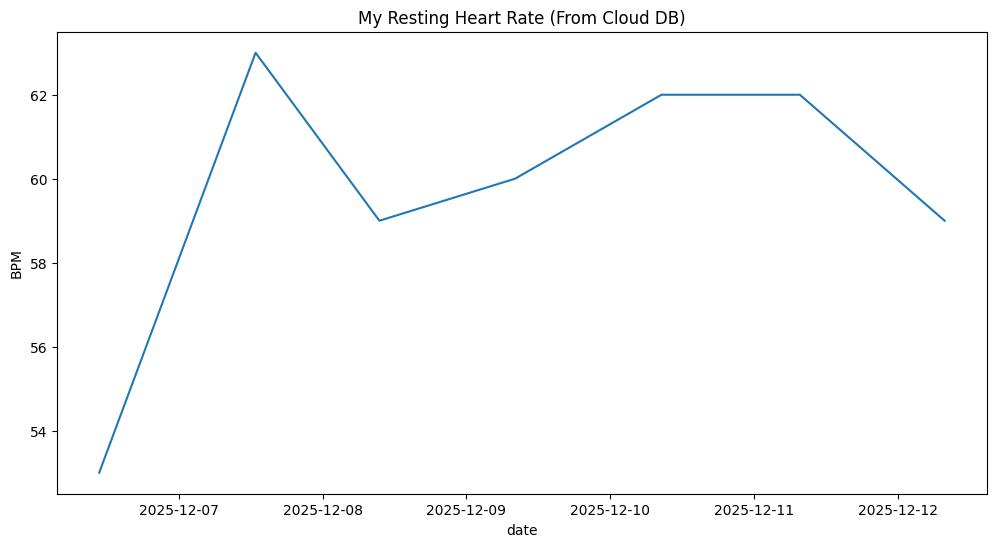

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv

# 1. Load your local .env (to get the Supabase Password)
load_dotenv()

# 2. Connect to the Cloud Database
db_url = os.getenv("DATABASE_URL")
if not db_url:
    print("Error: DATABASE_URL not found. Check your .env file.")
else:
    # Fix for IPv6 issues on local machine if needed, or just use the pooler URL
    engine = create_engine(db_url)
    print("Connected to Supabase!")

# 3. Fetch the Data (SQL -> Pandas)
print("Fetching metrics...")
query = "SELECT * FROM biometrics WHERE type = 'resting_heart_rate' ORDER BY date DESC LIMIT 500"
df = pd.read_sql(query, engine)

# 4. Show the Data
if df.empty:
    print("⚠️ No Resting Heart Rate data found yet.")
else:
    print(f"Loaded {len(df)} rows.")
    print(df.head())

    # 5. Visual Check
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='date', y='value')
    plt.title("My Resting Heart Rate (From Cloud DB)")
    plt.ylabel("BPM")
    plt.show()

In [4]:
query = "SELECT DISTINCT type FROM biometrics"
types = pd.read_sql(query, engine)
types_list = types['type'].tolist()
print("Available biometric types:", types_list)

Available biometric types: ['active_energy', 'apple_exercise_time', 'apple_stand_hour', 'apple_stand_time', 'basal_energy_burned', 'body_fat_percentage', 'body_mass_index', 'cardio_recovery', 'flights_climbed', 'headphone_audio_exposure', 'heart_rate', 'heart_rate_variability', 'lean_body_mass', 'physical_effort', 'resting_heart_rate', 'stair_speed_down', 'stair_speed_up', 'step_count', 'time_in_daylight', 'vo2_max', 'walking_asymmetry_percentage', 'walking_double_support_percentage', 'walking_heart_rate_average', 'walking_running_distance', 'walking_speed', 'walking_step_length', 'weight_body_mass']
